### Regional GDP Info

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon

In [3]:
df = pd.read_excel('../_data/UK_regional_gdp.xlsx', sheet_name='Dataset')

In [4]:
df.loc[:, 'industry'] = df.loc[:, 'industry'].map(lambda x: x.split(': ')[1])

In [14]:
industries = df['industry'].unique()

In [15]:
regions = ['East Midlands',
           'East of England', 
           'London',
           'North East',
           'North West',
           'South East',
           'South West',
           'Wales',
           'West Midlands',
           'Yorkshire and The Humber']
positions = [(750, 500), 
           (880, 420),
           (740, 260),
           (600, 900),
           (490, 600),
           (620, 280),
           (250, 150), 
           (350, 400), 
           (520, 400),
           (700, 650)]

In [24]:
j = 0
ar = np.array([[positions[j][0], positions[j][1]],
         [positions[j][0]+40, positions[j][1]],
         [positions[j][0]+20, positions[j][1]+20],
         [positions[j][0]+60, positions[j][1]+20] ])

In [25]:
ar.shape

(4, 2)

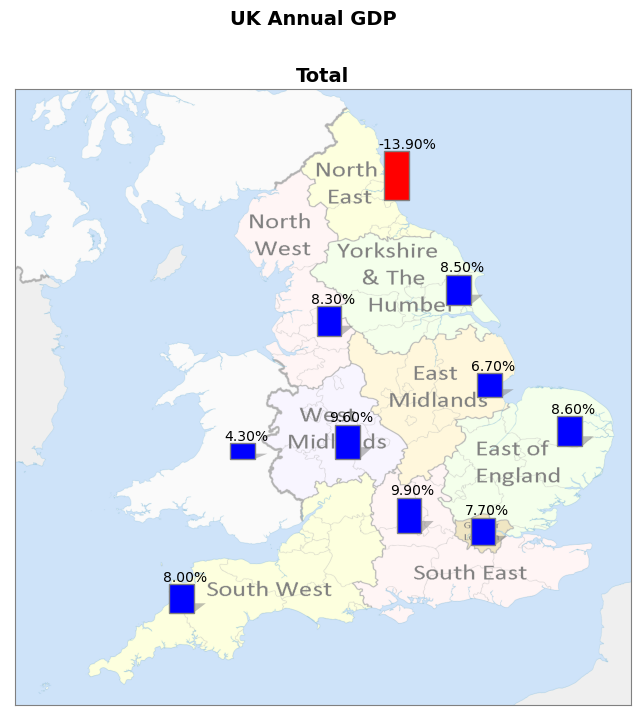

In [35]:
#One Data
industry = industries[0]
img = plt.imread("../_data/england.png")
f, ax = plt.subplots(figsize=(8, 8))
f.suptitle('UK Annual GDP', fontsize = 14, fontweight = 'bold')

last = df.loc[df['industry'] == industry, ['geography', '2021']]
last['scaled'] = last['2021'] / max(abs(last['2021'].min()), abs(last['2021'].max()) )
last['heights'] = last['scaled'] * 80

ax.imshow(img, alpha=0.5, extent=[0, 1000, 0, 1000])
ax.set_title(industry, fontsize = 14, fontweight = 'bold')
for j in range(len(positions)) :
    if last['heights'].iloc[j] >= 0 :
        color = 'blue'
        text_height = last['heights'].iloc[j]
        ar = np.array([[positions[j][0], positions[j][1]],
                   [positions[j][0]+40, positions[j][1]],
                   [positions[j][0]+60, positions[j][1]+abs(last['heights'].iloc[j]/3)],
                   [positions[j][0]+20, positions[j][1]+abs(last['heights'].iloc[j]/3)] ])
        ax.add_patch(Polygon(ar,
                              edgecolor = None,
                              facecolor = 'grey',
                              fill=True,
                              alpha=0.5,   
                              lw=0))
    else :
        color = 'red'
        text_height = 0
        
    
    ax.add_patch(Rectangle(positions[j], 40, last['heights'].iloc[j],
                              edgecolor = 'grey',
                              facecolor = color,
                              fill=True,
                              alpha=1,   
                              lw=1))
    
    ax.text(positions[j][0]-10,
            positions[j][1]+text_height+5,
            format(last['2021'].iloc[j]/100, '.02%'))
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines[['right', 'top', 'left', 'bottom']].set_color('gray')

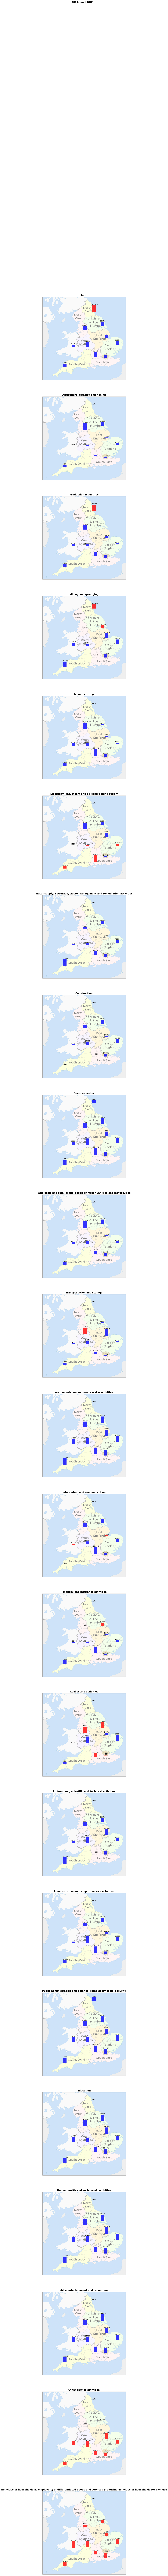

In [16]:
# All Data
img = plt.imread("../_data/england.png")
f, ax = plt.subplots(len(industries), figsize=(12, 12*len(industries)))
f.suptitle('UK Annual GDP', fontsize = 16, fontweight = 'bold')

for i, industry in enumerate(industries) :
    last = df.loc[df['industry'] == industry, ['geography', '2021']]
    last['scaled'] = last['2021'] / max(abs(last['2021'].min()), abs(last['2021'].max()) )
    last['heights'] = last['scaled'] * 80

    ax[i].imshow(img, alpha=0.5, extent=[0, 1000, 0, 1000])
    ax[i].set_title(industry, fontsize = 16, fontweight = 'bold')
    for j in range(len(positions)) :
        if last['heights'].iloc[j] >= 0 :
            color = 'blue'
            text_height = last['heights'].iloc[j]
        else :
            color = 'red'
            text_height = 0
        
        ax[i].add_patch(Rectangle(positions[j], 40, last['heights'].iloc[j],
             edgecolor = None,
             facecolor = color,
             fill=True,
             alpha=0.8,   
             lw=0))
        ax[i].text(positions[j][0]-10,
            positions[j][1]+text_height+5,
            format(last['2021'].iloc[j]/100, '.02%'))
        
        ax[i].get_xaxis().set_visible(False)
        ax[i].get_yaxis().set_visible(False)
        ax[i].spines[['right', 'top', 'left', 'bottom']].set_color('gray')